In [2]:
import numpy as np
import pandas as pd
import operator
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
data = []
with open('../data/Raw Data_GeneSpring.txt') as file:
    # iterate over file line by line
    for line in file:
        # strip and split line over tab symbols
        line = line.strip().split('\t')
        # convert map object into list of string values
        line = list(map(str, line))
        data.append(line)
data = np.array(data, dtype=object)

In [4]:
data

array([list(['ProbeName', 'GSM1149106_M_Ns3.txt:gProcessedSignal(normalized)', 'GSM1149107_M_Ns4.txt:gProcessedSignal(normalized)', 'GSM1149108_M_Ns5.txt:gProcessedSignal(normalized)', 'GSM1149109_M_Ns6.txt:gProcessedSignal(normalized)', 'GSM1149110_M_Ns7.txt:gProcessedSignal(normalized)', 'GSM1149111_M_Ns8.txt:gProcessedSignal(normalized)', 'GSM1149112_M_Ns9.txt:gProcessedSignal(normalized)', 'GSM1149113_M_Ns10.txt:gProcessedSignal(normalized)', 'GSM1149114_M_Ns11.txt:gProcessedSignal(normalized)', 'GSM1149115_M_Ns12.txt:gProcessedSignal(normalized)', 'GSM1149116_M_Ns13.txt:gProcessedSignal(normalized)', 'GSM1149117_M_Ns14.txt:gProcessedSignal(normalized)', 'GSM1149118_M_Sm1.txt:gProcessedSignal(normalized)', 'GSM1149119_M_Sm2.txt:gProcessedSignal(normalized)', 'GSM1149120_M_Sm3.txt:gProcessedSignal(normalized)', 'GSM1149121_M_Sm4.txt:gProcessedSignal(normalized)', 'GSM1149122_M_Sm5.txt:gProcessedSignal(normalized)', 'GSM1149123_M_Sm6.txt:gProcessedSignal(normalized)', 'GSM1149124_M_S

In [5]:
for i in range(1, len(data)):
    for j in range(len(data[1])):
        if( j != 0 ):
            data[i][j] = float(data[i][j])

In [6]:
data

array([list(['ProbeName', 'GSM1149106_M_Ns3.txt:gProcessedSignal(normalized)', 'GSM1149107_M_Ns4.txt:gProcessedSignal(normalized)', 'GSM1149108_M_Ns5.txt:gProcessedSignal(normalized)', 'GSM1149109_M_Ns6.txt:gProcessedSignal(normalized)', 'GSM1149110_M_Ns7.txt:gProcessedSignal(normalized)', 'GSM1149111_M_Ns8.txt:gProcessedSignal(normalized)', 'GSM1149112_M_Ns9.txt:gProcessedSignal(normalized)', 'GSM1149113_M_Ns10.txt:gProcessedSignal(normalized)', 'GSM1149114_M_Ns11.txt:gProcessedSignal(normalized)', 'GSM1149115_M_Ns12.txt:gProcessedSignal(normalized)', 'GSM1149116_M_Ns13.txt:gProcessedSignal(normalized)', 'GSM1149117_M_Ns14.txt:gProcessedSignal(normalized)', 'GSM1149118_M_Sm1.txt:gProcessedSignal(normalized)', 'GSM1149119_M_Sm2.txt:gProcessedSignal(normalized)', 'GSM1149120_M_Sm3.txt:gProcessedSignal(normalized)', 'GSM1149121_M_Sm4.txt:gProcessedSignal(normalized)', 'GSM1149122_M_Sm5.txt:gProcessedSignal(normalized)', 'GSM1149123_M_Sm6.txt:gProcessedSignal(normalized)', 'GSM1149124_M_S

In [242]:
temp_ = []
for i in range(1, len(data)):
    temp_.append(data[i][3])

In [243]:
# range of smokers and Non smokers
# range of Male Non smokers => (106 - 117)
# range of Male smokers => (117 - 129)
# range of Female Non smokers => (130 - 141)
# range of Female smokers => (114 -  153)

# non_smokers(Male)
non_sm_male = [[0.0]*12 for _ in range(1, len(data))]
for i in range(1, len(data)):
    for k in range(1, 13):
        non_sm_male[i-1][k-1] = data[i][k]

In [244]:
# smokers(Male)
sm_male = [[0.0]*12 for _ in range(1, len(data))]
x = -1
for i in range(1, len(data)):
    x = x + 1
    y = 0
    for j in range(13, 25):
        sm_male[x][y] = data[i][j]
        y = y + 1

In [245]:
#non_smokers(Female)
non_sm_female=[[0.0]*12 for _ in range(1,len(data))]
x = -1
for i in range(1,len(data)):
    x = x + 1
    y = 0
    for j in range(25,37):
        non_sm_female[x][y] = data[i][j]
        y = y + 1

In [246]:
#smokers(Female)
sm_female=[[0.0]*12 for p in range(1,len(data))]
x = -1
for i in range(1,len(data)):
    x = x + 1
    y = 0
    for j in range(37,49):
        sm_female[x][y] = data[i][j]
        y = y + 1

In [247]:
male_data = np.hstack((non_sm_male, sm_male))
female_data = np.hstack((non_sm_female, sm_female))
all_male_female_data = np.hstack((male_data, female_data))

In [248]:
#matrix=[male_mean,female_mean,non_smoker_mean,smoker_mean]
a_null=[[0]*4 for p in range(48)]
for i in range(12):
    a_null[i][0]=1
    a_null[i][2]=1
    
for i in range(12,24):
    a_null[i][0]=1
    a_null[i][3]=1

for i in range(24,36):
    a_null[i][1]=1
    a_null[i][2]=1
    
for i in range(36,48):
    a_null[i][1]=1
    a_null[i][3]=1
    

In [249]:
# Alternative Hypothesis
# Matrix = [male_ns_mean,male_s_mean,female_ns_mean,female_s_mean]

A = [[0]*4 for p in range(48)]
for i in range(12):
    A[i][0] = 1
    
for i in range(12,24):
    A[i][1] = 1

for i in range(24,36):
    A[i][2] = 1
    
for i in range(36,48):
    A[i][3] = 1

In [250]:
A = np.matrix(A)
a_null = np.matrix(a_null)

# Rank Calculation
r1 = np.linalg.matrix_rank(a_null)
r2 = np.linalg.matrix_rank(A)

In [251]:
# Calculation of F statistics
N = 48
I = np.identity(48)
F = list()
for i in range(len(all_male_female_data)):
    H = all_male_female_data[i]
    mat1 = np.matmul(H.T, I - (np.matmul(np.matmul(a_null, np.linalg.pinv(np.matmul(a_null.T, a_null))), a_null.T)))
    mat2 = np.matmul(H.T, I - (np.matmul(np.matmul(A, np.linalg.pinv(np.matmul(A.T, A))), A.T)))
    
    if np.matmul(mat2, H) == 0:
        f_stat = ((np.matmul(mat1, H)/0.0000000000000000001) - 1) * (N - r2)/(r2 - 1)
        F.append(f_stat)
    else:
        f_stat = ((np.matmul(mat1, H)/np.matmul(mat2, H)) - 1) * (N - r2)/(r2 - r1)
        F.append(f_stat)

In [252]:
F = np.array(F)
F = F.tolist()

In [253]:
for i in range(len(F)):
    F[i] = F[i][0]

In [254]:
### p-value calculation ###
dfd = 48 - r2
dfn = r2 - r1
p_score = 1 - stats.f.cdf(F, dfn, dfd)
print("p-Values Generated")

p-Values Generated


P-Values Histogram Saved


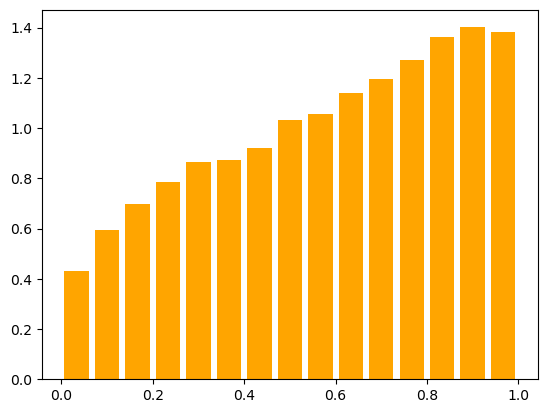

In [255]:
### p-value histogram ###
plt.hist(p_score, bins=15, rwidth=0.8, density=True, facecolor='orange')
plt.savefig("histogram.png")
print("P-Values Histogram Saved")

In [256]:
# Gene symbols
g_symbol = []
for i in range(len(data)):
    if (len(data[i]) > 49):
        g_symbol.append(data[i][49])
    else:
        g_symbol.append('NA')

In [257]:
index = 0
g_dict = dict()
g_list = list()
g_symbol_lst = list()
for i in range(len(p_score)):
    if p_score[i] < 0.05:
        index = index + 1
        g_dict[i] = [data[i][0], p_score[i][0]]
        g_list.append(data[i][0])
        if g_symbol[i] != 'NA':
            g_symbol_lst.append(g_symbol[i])

In [258]:
# save genes symbol list 
with open('genes_symbols_list.txt', 'w') as g_file:
    for line in g_symbol_lst:
        g_file.write("".join(line) + "\n")
print("Genes symbols file saved with name genes_symbols_list.txt")

Genes symbols file saved with name genes_symbols_list.txt


In [259]:
# save genes probe list
with open('genes_porbe_list.txt', 'w') as g_file:
    for line in g_list:
        g_file.write("".join(line) + "\n")
print("Genes probe list saved with name genes_probe_list.txt")

Genes probe list saved with name genes_probe_list.txt


In [260]:
# false discovery rate
def FDR(p_score):
    q = 0.05
    n0 = 811 * 0.2
    fdr = list()
    for i in range(len(p_score)):
        fdr.append(p_score[i][0])
    fdr = np.sort(fdr)
    c = 0
    for i in range(0, len(fdr)):
        if n0 * fdr[i]/(i+1) <= q:
            c = c + 1
    return fdr

In [261]:
FDR(p_score)

array([1.10554044e-04, 1.31050111e-04, 3.01869021e-04, ...,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00])

In [262]:
# Intersect with the following gene lists: Xenobiotic metabolism, Free Radical Response, DNA Repair, Natural Killer Cell Cytotoxicity.
##### Find Intersection (File 1) #####
def genes_and_Xenobiotic(g_symbol_lst):
    with open('../data/XenobioticMetabolism1.txt') as Xenobiotic_file:
        next(Xenobiotic_file)
        next(Xenobiotic_file)
        Xenobiotic_data_file = [list(map(str, line.strip().split('\t'))) for line in Xenobiotic_file]
    check = list()
    for i in range(len(Xenobiotic_data_file)):
        check.append(Xenobiotic_data_file[i][0])

    gsIntxs = list()
    for gs in g_symbol_lst:
        for xs in check:
            if gs == xs:
                gsIntxs.append(gs)
    print("Genes Symbol Intersection with Xenobiotic ",gsIntxs)
    print("Numbers of Genes that are intersecting with Xenobiotic Metabolism: ", len(gsIntxs))
    return gsIntxs

In [263]:
gxs = genes_and_Xenobiotic(g_symbol_lst)

Genes Symbol Intersection with Xenobiotic  ['CYB5R3', 'AOC1', 'SULT1A1', 'GRIN1', 'AS3MT']
Numbers of Genes that are intersecting with Xenobiotic Metabolism:  5


In [264]:
gxs

['CYB5R3', 'AOC1', 'SULT1A1', 'GRIN1', 'AS3MT']

In [285]:
##### Find Intersection (File 2) #####
def genes_and_freeRadical(g_symbol_lst):
    with open("../data/FreeRadicalResponse.txt") as free_readical_file:
        next(free_readical_file)
        next(free_readical_file)
        free_readical_data_file = [list(map(str, line.strip().split('\t'))) for line in free_readical_file]

    check = list()
    for i in range(len(free_readical_data_file)):
        check.append(free_readical_data_file[i][0])

    gsIntFrs = list()
    for gs in g_symbol_lst:
        for frs in check:
            if gs == frs:
                gsIntFrs.append(gs)

    print("Genes Symbol Intersection with Free Radical Response ", gsIntFrs)
    print("Numbers of Genes that are intersecting with free Radical Response: ", len(gsIntFrs))
    return gsIntFrs

In [286]:
gfrs = genes_and_freeRadical(g_symbol_lst)

Genes Symbol Intersection with Free Radical Response  ['NFE2L2', 'DHFR', 'ADPRHL2']
Numbers of Genes that are intersecting with free Radical Response:  3


In [284]:
##### Find Intersection (File3) #####
def genes_and_DNA(g_symbol_lst):
    with open('../data/DNARepair1.txt') as DNA_file:
        next(DNA_file)
        next(DNA_file)
        DNA_data_file = [list(map(str, line.strip().split("\t"))) for line in DNA_file]

    check = list()
    for i in range(len(DNA_data_file)):
        check.append(DNA_data_file[i][0])

    gsIntDnas = list()
    for gs in g_symbol_lst:
        for dnas in check:
            if gs == dnas:
                gsIntDnas.append(gs)

    print("Genes Symbol Intersetion with DNA Repair:", gsIntDnas)
    print("Numbers of Genes that are intersecting with DNA Repair: ", len(gsIntDnas))
    return gsIntDnas

In [268]:
gDnas = genes_and_DNA(g_symbol_lst)

Genes Symbol Intersetion with DNA Repair: ['MSH3', 'HMGB1', 'RAD17']
Numbers of Genes that are intersecting with DNA Repair:  3


In [282]:
##### Find Intersection (File 4) #####
def genes_and_NKCell(g_symbol_lst):
    with open('../data/NKCellCytotoxicity.txt') as NK_file:
        next(NK_file)
        next(NK_file)
        NK_data_file = [list(map(str, line.strip().split("\t"))) for line in NK_file]

    check = list()
    for i in range(len(NK_data_file)):
        check.append(NK_data_file[i][0])

    gsIntNks = list()
    for gs in g_symbol_lst:
        for nks in check:
            if gs == nks:
                gsIntNks.append(gs)

    print("Genes Symbol Intersetion with NKCellCytotoxicity : ", gsIntNks)
    print("Numbers of Genes that are intersecting with NKCellCytotoxicity: ", len(gsIntNks))
    return gsIntNks

In [283]:
gNks = genes_and_NKCell(g_symbol_lst)

Genes Symbol Intersetion with NKCellCytotoxicity :  ['SHC2', 'PRKCB']
Numbers of Genes that are intersecting with NKCellCytotoxicity:  2


In [271]:
# Report intersection counts for each list, split into four groups; 
# Going down in women smokers vs non-smokers/going up in women smokers vs non-smokers.

##### Grouping Lists #####
female_sm_up = []
female_sm_down = []
male_sm_up = []
male_sm_down = []

# Grouping (1)
rows_values = list()
t3mp_genes = list()
for i in range(len(g_symbol)):
    for j in range(len(gxs)):
        if(g_symbol[i] == gxs[j]):
            t3mp_genes.append(gxs[j])
            rows_values.append(i)
            break 

In [272]:
print("\nGrouping(Xenobiotic Metabolism): ")
print("Probes-Names","Genes-Symbols","Male-NonSm","Male-Sm","Female-NonSm","Female-Sm")
for i in rows_values:
    male_nonsm=all_male_female_data[i,0:12]
    male_sm=all_male_female_data[i,12:24]
    female_nonsm=all_male_female_data[i,24:36]
    female_sm=all_male_female_data[i,36:48]
    male_nonsm_mean=np.mean(male_nonsm)
    male_sm_mean=np.mean(male_sm)
    female_nonsm_mean=np.mean(female_nonsm)
    female_sm_mean=np.mean(female_sm)
    if(male_nonsm_mean<male_sm_mean):
        male_sm_up.append(g_symbol[i])
    if(male_nonsm_mean>male_sm_mean):
        male_sm_down.append(g_symbol[i])
    if(female_nonsm_mean<female_sm_mean):
        female_sm_up.append(g_symbol[i])
    if(female_nonsm_mean>female_sm_mean):
        female_sm_down.append(g_symbol[i])
    
    print(data[i+1][0],g_symbol[i],male_nonsm_mean,male_sm_mean,female_nonsm_mean,female_sm_mean)


Grouping(Xenobiotic Metabolism): 
Probes-Names Genes-Symbols Male-NonSm Male-Sm Female-NonSm Female-Sm
A_23_P123692 CYB5R3 8.238623008333333 8.0640275 7.932038808333334 8.117148741666666
A_23_P213832 AOC1 9.699954916666668 9.525425833333333 9.276934666666667 9.587167083333332
A_23_P16370 SULT1A1 1.1078251833333332 1.7331047216666668 2.1989470166666663 1.2664091558333332
A_24_P932339 GRIN1 0.2671923166666667 0.9267140166666668 1.0594928 0.9510150666666667
A_23_P50638 CYB5R3 12.49393708333333 12.215654999999998 12.410789833333334 12.47807075
A_32_P102224 GRIN1 0.8926473441666668 2.19753698 1.7219506341666666 0.7549497045000001
A_23_P125082 GRIN1 6.5677074750000015 6.674385125 6.529242991666667 6.805067125000001
A_24_P751492 AS3MT 2.5741383916666662 4.1946882 3.8657874583333336 3.3792333333333335
A_23_P142146 CYB5R3 15.830553083333333 15.755078416666665 15.916400666666666 15.986185166666667


In [273]:
#### Grouping (2) ####

rows_values = []
t3mp_genes = []
for i in range(len(g_symbol)):
    for j in range(len(gfrs)):
        if(g_symbol[i] == gfrs[j]):
            t3mp_genes.append(gfrs[j])
            rows_values.append(i)
            break 

In [274]:
#### Grouping (3) ####

rows_values = []
t3mp_genes = []
for i in range(len(g_symbol)):
    for j in range(len(gDnas)):
        if(g_symbol[i] == gDnas[j]):
            t3mp_genes.append(gDnas[j])
            rows_values.append(i)
            break 

In [275]:
print("\nGrouping for DNA Repair")
print("Probes-Names","Genes-Symbols","Male-NonSm","Male-Sm","Female-NonSm","Female-Sm")
for i in rows_values:
    male_nonsm=all_male_female_data[i,0:12]
    male_s=all_male_female_data[i,12:24]
    female_ns=all_male_female_data[i,24:36]
    female_s=all_male_female_data[i,36:48]
    male_nonsm_mean=np.mean(male_nonsm)
    male_sm_mean=np.mean(male_sm)
    female_nonsm_mean=np.mean(female_nonsm)
    female_sm_mean=np.mean(female_sm)
    if(male_nonsm_mean<male_sm_mean):
        male_sm_up.append(g_symbol[i])
    if(male_nonsm_mean>male_sm_mean):
        male_sm_down.append(g_symbol[i])
    if(female_nonsm_mean<female_sm_mean):
        female_sm_up.append(g_symbol[i])
    if(female_nonsm_mean>female_sm_mean):
        female_sm_down.append(g_symbol[i])
    print(data[i+1][0],g_symbol[i],male_nonsm_mean,male_sm_mean,female_nonsm_mean,female_sm_mean)


Grouping for DNA Repair
Probes-Names Genes-Symbols Male-NonSm Male-Sm Female-NonSm Female-Sm
A_23_P123692 CYB5R3 8.238623008333333 15.755078416666665 15.916400666666666 15.986185166666667
A_23_P213832 AOC1 9.699954916666668 15.755078416666665 15.916400666666666 15.986185166666667
A_23_P16370 SULT1A1 1.1078251833333332 15.755078416666665 15.916400666666666 15.986185166666667
A_24_P932339 GRIN1 0.2671923166666667 15.755078416666665 15.916400666666666 15.986185166666667
A_23_P50638 CYB5R3 12.49393708333333 15.755078416666665 15.916400666666666 15.986185166666667
A_32_P102224 GRIN1 0.8926473441666668 15.755078416666665 15.916400666666666 15.986185166666667
A_23_P125082 GRIN1 6.5677074750000015 15.755078416666665 15.916400666666666 15.986185166666667
A_24_P751492 AS3MT 2.5741383916666662 15.755078416666665 15.916400666666666 15.986185166666667
A_23_P142146 CYB5R3 15.830553083333333 15.755078416666665 15.916400666666666 15.986185166666667
A_32_P64324 NFE2L2 8.428780408333333 15.755078416666

In [276]:
#### Grouping (4) 

rows_values = []
t3mp_genes = []
for i in range(len(g_symbol)):
    for j in range(len(gNks)):
        if(g_symbol[i]==gNks[j]):
            print(gNks[j])
            t3mp_genes.append(gNks[j])
            rows_values.append(i)
            break 

SHC2
PRKCB
PRKCB
PRKCB


In [277]:
print("\nGrouping for Natural Killer Cell")
print("Probes-Names","Genes-Symbols","Male-NonSm","Male-Sm","Female-NonSm","Female-Sm")
for i in rows_values:
    male_nonsm = all_male_female_data[i,0:12]
    male_sm = all_male_female_data[i,12:24]
    female_nonsm = all_male_female_data[i,24:36]
    female_sm = all_male_female_data[i,36:48]
    male_nonsm_mean = np.mean(male_nonsm)
    male_sm_mean = np.mean(male_sm)
    female_nonsm_mean = np.mean(female_nonsm)
    female_sm_mean = np.mean(female_sm)
    if(male_nonsm_mean < male_sm_mean):
        male_sm_up.append(g_symbol[i])
    if(male_nonsm_mean > male_sm_mean):
        male_sm_down.append(g_symbol[i])
    if(female_nonsm_mean < female_sm_mean):
        female_sm_up.append(g_symbol[i])
    if(female_nonsm_mean > female_sm_mean):
        female_sm_down.append(g_symbol[ i])
    print(data[i+1][0],g_symbol[i],male_nonsm_mean,male_sm_mean,female_nonsm_mean,female_sm_mean)


Grouping for Natural Killer Cell
Probes-Names Genes-Symbols Male-NonSm Male-Sm Female-NonSm Female-Sm
A_23_P123692 CYB5R3 8.238623008333333 8.0640275 7.932038808333334 8.117148741666666
A_23_P213832 AOC1 9.699954916666668 9.525425833333333 9.276934666666667 9.587167083333332
A_23_P16370 SULT1A1 1.1078251833333332 1.7331047216666668 2.1989470166666663 1.2664091558333332
A_24_P932339 GRIN1 0.2671923166666667 0.9267140166666668 1.0594928 0.9510150666666667
A_23_P50638 CYB5R3 12.49393708333333 12.215654999999998 12.410789833333334 12.47807075
A_32_P102224 GRIN1 0.8926473441666668 2.19753698 1.7219506341666666 0.7549497045000001
A_23_P125082 GRIN1 6.5677074750000015 6.674385125 6.529242991666667 6.805067125000001
A_24_P751492 AS3MT 2.5741383916666662 4.1946882 3.8657874583333336 3.3792333333333335
A_23_P142146 CYB5R3 15.830553083333333 15.755078416666665 15.916400666666666 15.986185166666667
A_32_P64324 NFE2L2 8.428780408333333 8.130662733333335 8.276304666666666 8.385044958333333
A_23_P37

In [278]:
print("\n****************** Final Grouping ***********************")
print("Female Smokers up genes" ,set(female_sm_up))
print("Female Smokers Down genes", set(female_sm_down))
print("Male Smokers up genes" ,set(male_sm_up))
print("Male Smokers down genes" ,set(male_sm_down))


****************** Final Grouping ***********************
Female Smokers up genes {'ADPRHL2', 'CYB5R3', 'AOC1', 'DHFR', 'AS3MT', 'GRIN1', 'SULT1A1', 'NFE2L2'}
Female Smokers Down genes {'ADPRHL2', 'DHFR', 'AS3MT', 'GRIN1', 'SULT1A1'}
Male Smokers up genes {'ADPRHL2', 'CYB5R3', 'AOC1', 'DHFR', 'AS3MT', 'GRIN1', 'SULT1A1', 'NFE2L2'}
Male Smokers down genes {'CYB5R3', 'DHFR', 'AOC1', 'NFE2L2'}
